In [251]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import pandas as pd
import seaborn as sns
import kagglehub


In [252]:
# Descargamos el dataset
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\santiago.fernandezse\.cache\kagglehub\datasets\blastchar\telco-customer-churn\versions\1


In [253]:
dfTelco = pd.read_csv(path+'/WA_Fn-UseC_-Telco-Customer-Churn.csv')
dfTelco

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [254]:
dfTelco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


No pasamos los datos (TotalCharges y MonthlyCharges) de tipo object a numeric ya que empeora la precisión

In [256]:
categorical_features = [
    'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod', 'gender','SeniorCitizen',
    'Partner', 'Dependents','PhoneService', 'PaperlessBilling', 'Churn'
]

# Vamos a eliminar la columna de ID, porque no es necesario para nuestro algoritmo

# Vamos a convertir las todas las columnas tipo object con label encoder

le = LabelEncoder()
for col in categorical_features:
    if dfTelco[col].dtype == 'object':
        dfTelco[col] = le.fit_transform(dfTelco[col])

dfTelco['TotalCharges'] = pd.to_numeric(dfTelco['TotalCharges'], errors='coerce')

dfTelco.drop('customerID', axis=1, inplace=True)



In [257]:
dfTelco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


In [258]:
# Comprobamos si hay valores nulos
dfTelco.isnull().sum()
dfTelco


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


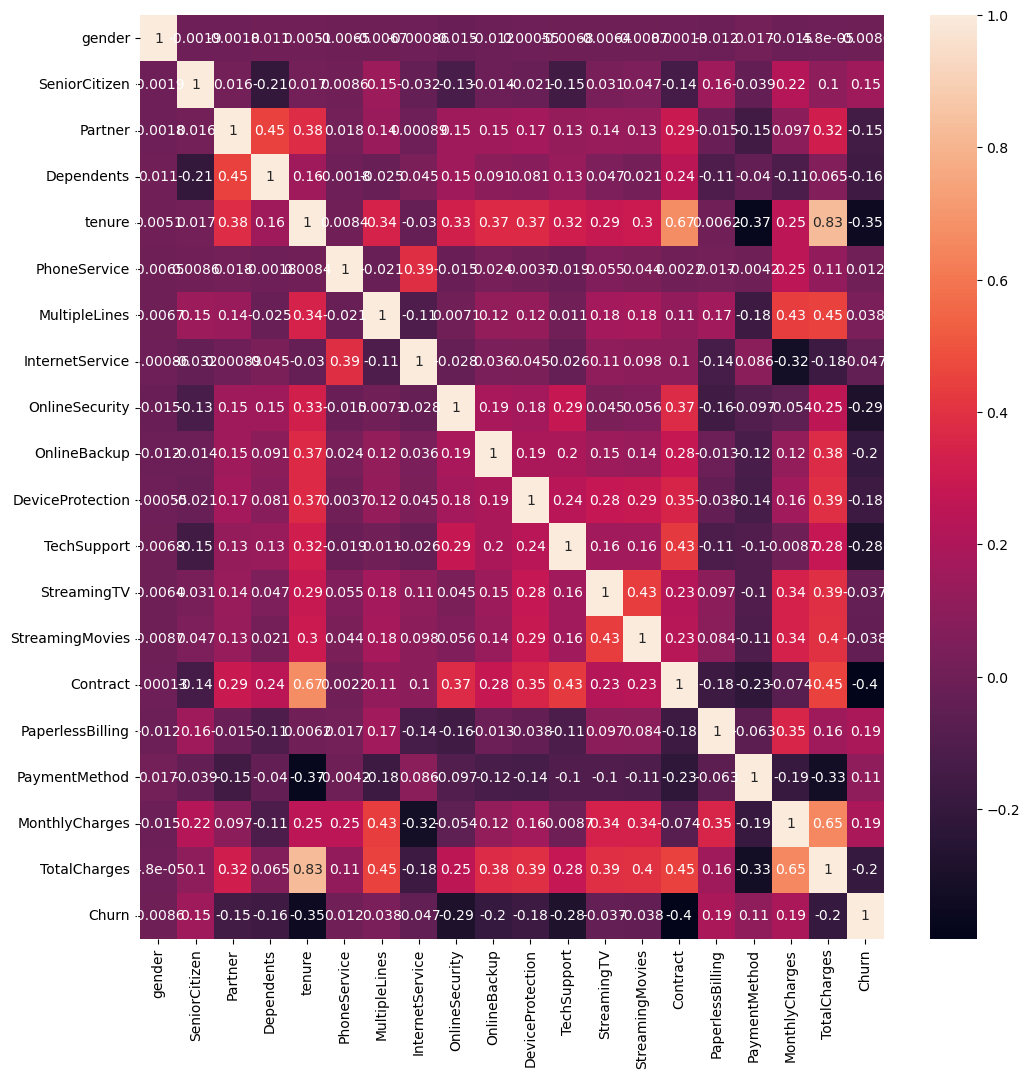

In [259]:
# Creamos un mapa de calor para comprobar las relaciones entre las columnas de nuestro dataframe, la columna con la que vamos a trabajar es Churn

corr = dfTelco.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr, annot=True)
plt.show()


In [260]:
# Vamos a entrar un modelo de ia basade en el algoritmo de knn
# Vamos a usar los campos de seniorcitizen, tenure, onlinebackup, techsupport, contract, paperlessbilling, monthlycharges, totalcharges

X = dfTelco[['SeniorCitizen', 'Partner', 'tenure', 'OnlineBackup', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges']]
y = dfTelco['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

In [261]:
def plot_sigmoid_line(df, feature_cols, target_col):
    # Extraer características y variable objetivo
    X = df[feature_cols].values.reshape(-1, 1)
    y = df[target_col].values

    # Normalizar las características
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Crear una instancia del clasificador de regresión logística y ajustar los datos
    clf = LogisticRegression()
    clf.fit(X_scaled, y)

    # Crear una malla para el gráfico
    x_min, x_max = X_scaled.min() - 1, X_scaled.max() + 1
    xx = np.linspace(x_min, x_max, 300).reshape(-1, 1)

    # Predecir las probabilidades en la malla
    Z = clf.predict_proba(xx)[:, 1]

    # Graficar la línea sigmoide
    plt.figure()
    plt.plot(xx, Z, color='red', label='Curva Sigmoide')
    plt.xlabel(feature_col)
    plt.ylabel('Probabilidad')
    plt.title("Línea Sigmoide de Regresión Logística")
    plt.legend()
    plt.show()

# Uso de la función con tu dataset
plot_sigmoid_line(dfTelco, 'TotalCharges', 'Churn')


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [184]:
param_grid = {
    'n_neighbors': range(1, 100),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30, 40, 50],
    'p': [1, 2]
}

In [185]:
"""
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
grid_search.score(X_test, y_test)

best_params_grid = grid_search.best_params_
print(f"Mejores hiperparámetros (GridSearchCV): {best_params_grid}")
"""

'\ngrid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring=\'accuracy\')\ngrid_search.fit(X_train, y_train)\ngrid_search.score(X_test, y_test)\n\nbest_params_grid = grid_search.best_params_\nprint(f"Mejores hiperparámetros (GridSearchCV): {best_params_grid}")\n'

In [186]:
random_search = RandomizedSearchCV(KNeighborsClassifier(), param_grid, cv=5, n_iter=10, random_state=42, scoring='accuracy')
random_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros de RandomizedSearchCV
best_params_random = random_search.best_params_
print(f"Mejores hiperparámetros (RandomizedSearchCV): {best_params_random}")

Mejores hiperparámetros (RandomizedSearchCV): {'weights': 'distance', 'p': 1, 'n_neighbors': 82, 'leaf_size': 10, 'algorithm': 'brute'}


In [187]:
knn = KNeighborsClassifier(n_neighbors=25, weights='uniform', algorithm='ball_tree', leaf_size=20, p=2)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8113475177304964


In [188]:
#utilizo los datos que ya tenía para pruebas
y_pred = knn.predict(X_test)

#podemos también usar predict_proba para tener las probabilidades de clase
probabilidades = knn.predict_proba(X_test)
print(probabilidades[:10]) 

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print ("Error Cuadrático Medio:", mse)
print ("Raíz del Error Cuadrático Medio:", rmse)
print ("Coeficiente de determinación R2:", r2)

[[0.92 0.08]
 [1.   0.  ]
 [0.52 0.48]
 [0.8  0.2 ]
 [0.6  0.4 ]
 [0.8  0.2 ]
 [0.92 0.08]
 [0.68 0.32]
 [0.72 0.28]
 [1.   0.  ]]
Error Cuadrático Medio: 0.18865248226950354
Raíz del Error Cuadrático Medio: 0.43434143512852136
Coeficiente de determinación R2: 0.03201329671917896


In [189]:
# haz unn df con la real y la predicciones
df = pd.DataFrame({'Real':y_test, 'Prediccion':y_pred})
df

,Real,Prediccion
402,1,0
1292,0,0
1175,0,0
4600,0,0
3464,0,0
...,...,...
1401,1,1
213,0,0
5444,0,0
3031,1,0


In [190]:
# Crear vecinos
neighbors = np.arange(1,30)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
  	# escogemos KNN Classifier
	knn = KNeighborsClassifier(neighbor)
	# Fit the model
	knn.fit(X_train, y_train)
  
	# Calcular accuracy
	train_accuracies[neighbor] = knn.score(X_train, y_train)
	test_accuracies[neighbor] = knn.score(X_test, y_test) 
print(neighbors, '\n', train_accuracies, '\n', test_accuracies)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29] 
 {np.int64(1): 0.9954244241085516, np.int64(2): 0.8676238561060271, np.int64(3): 0.8663616282739034, np.int64(4): 0.8390659514042285, np.int64(5): 0.8403281792363522, np.int64(6): 0.8250236667718523, np.int64(7): 0.8269170085200379, np.int64(8): 0.8185547491322184, np.int64(9): 0.818081413695172, np.int64(10): 0.8130325023666772, np.int64(11): 0.8100347112653834, np.int64(12): 0.8128747238876617, np.int64(13): 0.8135058378037235, np.int64(14): 0.8108236036604607, np.int64(15): 0.8081413695171978, np.int64(16): 0.8109813821394761, np.int64(17): 0.8082991479962133, np.int64(18): 0.8079835910381824, np.int64(19): 0.8079835910381824, np.int64(20): 0.8051435784159041, np.int64(21): 0.8059324708109814, np.int64(22): 0.8053013568949196, np.int64(23): 0.8051435784159041, np.int64(24): 0.8038813505837804, np.int64(25): 0.803408015146734, np.int64(26): 0.8038813505837804, np.int64(27): 0.803408015146734, n

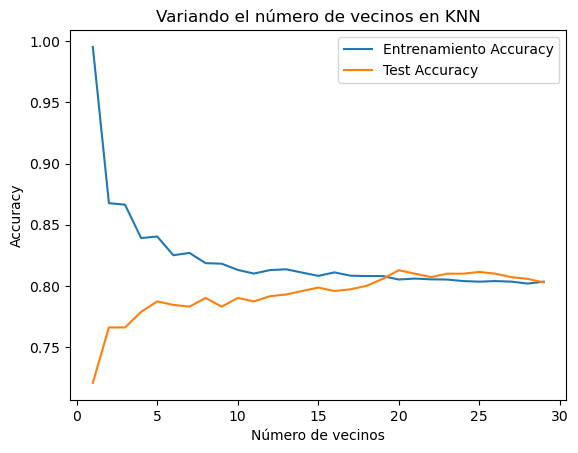

In [191]:
plt.title("Variando el número de vecinos en KNN")

# Plot training accuracies
plt.plot(neighbors, train_accuracies.values(), label="Entrenamiento Accuracy") 

# Plot test accuracies
plt.plot(neighbors, test_accuracies.values(), label="Test Accuracy") 

plt.legend()
plt.xlabel("Número de vecinos")
plt.ylabel("Accuracy")

# Display the plot
plt.show()

In [192]:
cm = confusion_matrix(y_test, y_pred)

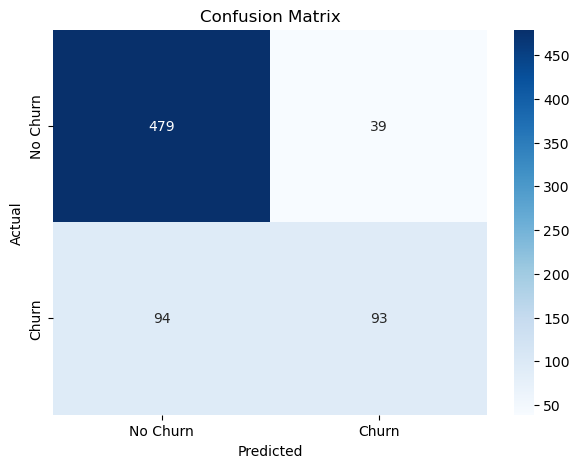

In [193]:
# Create a confusion matrix from the variable cm to calculate the number of correct and incorrect predictions between Churn 0 or 1, i.e., whether the customer left the company or not
# Add below the number if it is TP, FP, TN, FN
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

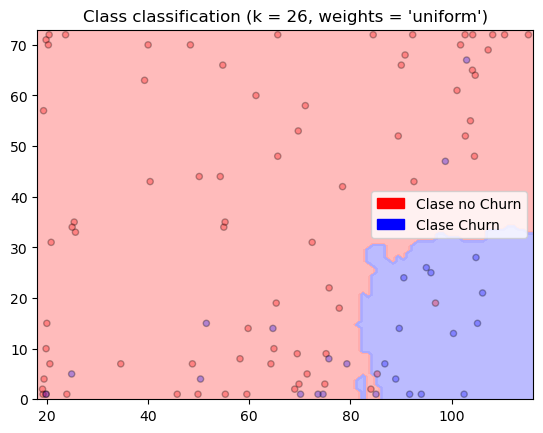

In [194]:

# 'Partner','SeniorCitizen', 'Dependents', 'tenure', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',  'PaymentMethod', 'MonthlyCharges'

# Seleccionar dos características para la visualización
X_vis = dfTelco[['MonthlyCharges', 'tenure']].values
y = dfTelco['Churn'].values  # Asegúrate de que y sea una serie o array

sample_size = 100  # Número de puntos a mostrar
if len(X_vis) > sample_size:
    indices = np.random.choice(len(X_vis), sample_size, replace=False)
    X_vis = X_vis[indices]
    y = y[indices]

# Parámetros del clasificador
n_neighbors = 26
weights = 'uniform'

# Crear una instancia del clasificador y ajustar los datos
clf = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, )
clf.fit(X_vis, y)

# Crear color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#0000FF'])

# Graficar el resultado usando DecisionBoundaryDisplay
disp = DecisionBoundaryDisplay.from_estimator(
    clf,
    X_vis,
    response_method="predict",
    cmap=cmap_light,
    alpha=0.8
)

# Graficar también los puntos de entrenamiento
disp.ax_.scatter(X_vis[:, 0], X_vis[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20, alpha=0.3)
disp.ax_.set_xlim(X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1)  # Ajustar el rango del eje x
disp.ax_.set_ylim(X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1)  # Ajustar el rango del eje y

# Crear leyenda
unique_classes = np.unique(y)
class_labels = ['Clase no Churn' if cls == 0.0 else 'Clase Churn' for cls in unique_classes]
patches = [mpatches.Patch(color=cmap_bold(i), label=label) for i, label in enumerate(class_labels)]
disp.ax_.legend(handles=patches)

# Título del gráfico
disp.ax_.set_title("Class classification (k = %i, weights = '%s')" % (n_neighbors, weights))

# Mostrar el gráfico
plt.show()


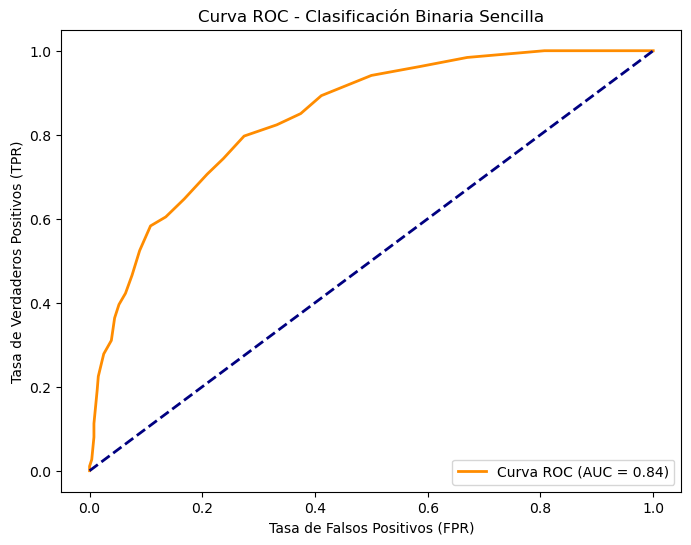

AUC: 0.84


In [195]:

# Realizar predicciones con el conjunto de prueba (probabilidades) para ROC
y_pred_prob = knn.predict_proba(X_test)[:, 1]  # Probabilidades de la clase positiva (1)

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calcular el AUC (Área Bajo la Curva)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Línea aleatoria (AUC = 0.5)
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - Clasificación Binaria Sencilla')
plt.legend(loc='lower right')
plt.show()

print(f'AUC: {roc_auc:.2f}')